# M&S.3 - K-Mean (Scikit Learn)

In [133]:
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn

import matplotlib.pyplot as plt
from matplotlib import rcParams

In [60]:
%matplotlib inline
rcParams['figure.figsize'] = 7, 4

## Load Iris Dataset

The **sklearn.datasets** module includes popular reference datasets.

- datasets.load_boston(): Load and return the boston house-prices dataset (regression).
- datasets.load_breast_cancer(): Load and return the breast cancer wisconsin dataset (classification).
- datasets.load_diabetes(): Load and return the diabetes dataset (regression).
- datasets.load_digits(): Load and return the digits dataset (classification).
- **datasets.load_iris(): Load and return the iris dataset (classification).**
- datasets.load_linnerud(): Load and return the linnerud dataset (multivariate regression).
- datasets.load_sample_images(): Load sample images for image manipulation.
- datasets.load_wine(): Load and return the wine dataset (classification).

Return **Bunch**, a dictionary-like object, the interesting attributes are: 
- ‘data’, the data to learn, 
- ‘target’, the classification labels, 
- ‘target_names’, the meaning of the labels, 
- ‘feature_names’, the meaning of the features, 
- ‘DESCR’, the full description of the dataset, 

In [61]:
from sklearn import datasets

iris = datasets.load_iris()

#iris.data
#iris.target
#iris.target_names
#iris.feature_names

print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [62]:
# numpy.c_ = Translates slice objects to concatenation along the second axis.
df = pd.DataFrame(data= np.c_[iris.data, iris.target], columns= iris.feature_names + ['target'])
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [143]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Building and Running K-Mean Model
The k-means problem is solved using either Lloyd’s or Elkan’s algorithm.

**KMeans**(**n_clusters**=8, **init**=’k-means++’, **n_init**=10, **max_iter**=300, **tol**=0.0001, precompute_distances=’auto’, verbose=0, **random_state**=None, copy_x=True, n_jobs=None, algorithm=’auto’)
- **n_clusters**: The number of clusters to form as well as the number of centroids to generate.
- **init**: Method for initialization.
- **n_init**: Number of time the k-means algorithm will be run with different centroid seeds. 
- **max_iter**: Maximum number of iterations of the k-means algorithm for a single run.
- **tol**: Relative tolerance with regards to inertia to declare convergence.
- **random_state**: Determines random number generation for centroid initialization. Use an int to make the randomness deterministic.

In [64]:
from sklearn.cluster import KMeans

clustering = KMeans(n_clusters = 3, random_state = 5)
clustering.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [65]:
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [66]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [67]:
# Sum of squared distances of samples to their closest cluster center.
clustering.inertia_

78.85144142614601

## Plotting your model outputs

In [68]:
# Data
iris_data_df = pd.DataFrame(iris.data)
iris_data_df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

# Target
iris_target_df = pd.DataFrame(iris.target)
iris_target_df = columns = ['Targets']

Text(0.5, 1.0, 'K-Measn Classification')

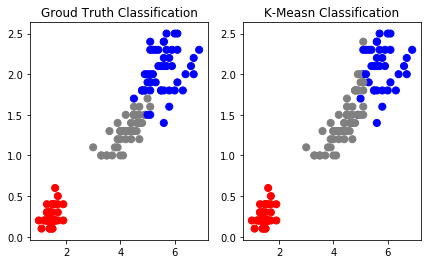

In [69]:
color_theme = np.array(['red','grey','blue'])

plt.subplot(1,2,1)
plt.scatter(x=iris_data_df['Petal Length'], y=iris_data_df['Petal Width'], c=color_theme[iris.target], s=50)
plt.title('Groud Truth Classification')

relabel = np.choose(clustering.labels_,[1,0,2]).astype(np.int64) # [0,1,2]->[1,0,2]

plt.subplot(1,2,2)
plt.scatter(x=iris_data_df['Petal Length'], y=iris_data_df['Petal Width'], c=color_theme[relabel], s=50)
plt.title('K-Measn Classification')

## Evaluate the classification

In [70]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print ('Accuracy: ', accuracy_score(iris.target, relabel))
print ('Precision: ', precision_score( iris.target, relabel, average=None ))
print ('Recall: ', recall_score( iris.target, relabel, average=None  ) )
print ('F1-score: ', f1_score( iris.target, relabel, average=None  ) )

Accuracy:  0.8933333333333333
Precision:  [1.         0.77419355 0.94736842]
Recall:  [1.   0.96 0.72]
F1-score:  [1.         0.85714286 0.81818182]


In [71]:
from sklearn.metrics import classification_report

# Text summary of the precision, recall, F1 score for each class. 
print (classification_report(iris.target,relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

   micro avg       0.89      0.89      0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



- Precision Score: accuracy of positive predictions:
    TP/(TP + FP)

- Recall Score (aka sensitivity or true positive rate): fraction of positives that were correctly identified:
    TP/(TP + FN)

- F1 Score: takes into account precision and the recall. It is created by finding the the harmonic mean of precision and recall.

    2 x (precision x recall)/(precision + recall)
    
F1 Score is a helpful metric for comparing two classifiers. 
    

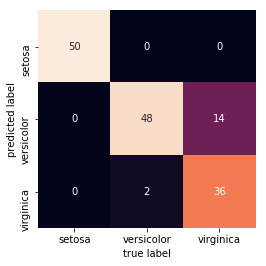

In [72]:
from sklearn.metrics import confusion_matrix

iris_cm = confusion_matrix(iris.target,relabel)
sb.heatmap(iris_cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Evaluate the clasterization

In [80]:
# Sum of squared distances of samples to their closest cluster center.
clustering.inertia_

78.85144142614601

In [85]:
from sklearn.metrics import silhouette_score

# Silhouette
print ('Silhouette score: ', silhouette_score(iris.data, relabel))

Silhouette score:  0.5528190123564091


## How to determine the optimal number for K

In [117]:
Sum_of_squared_distances = []
Silhouette_score = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(iris.data)
    
    Sum_of_squared_distances.append( km.inertia_ )
    if k == 1:
        Silhouette_score.append( 1 )
    else:
        Silhouette_score.append( silhouette_score( iris.data, km.labels_ ) )

In [118]:
print(Sum_of_squared_distances)
print(Silhouette_score)

[681.3706, 152.34795176035792, 78.85144142614601, 57.228473214285714, 46.69542573099416, 41.705906926406925, 35.07098807768808, 30.33777154862682, 28.33256926406927, 26.105432957393486, 24.29988750284803, 22.945565055336225, 22.045816298689868, 20.362173060857273]
[1, 0.681046169211746, 0.5528190123564091, 0.4980505049972867, 0.4922441515961945, 0.4819221559062962, 0.36060703826537294, 0.3390450925992608, 0.3372846589120054, 0.3195058587839572, 0.3245711610007452, 0.3023264403061529, 0.2905351348533326, 0.28489795379039673]


Text(0, 0.5, 'Silhouette_score')

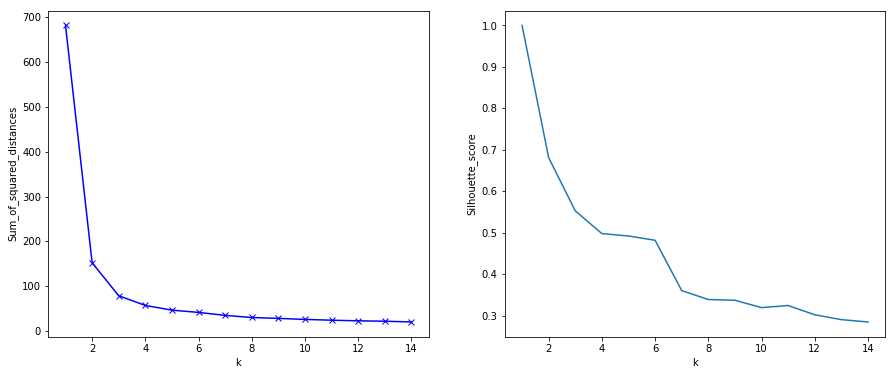

In [119]:
fig = plt.figure(figsize=[15,6])

ax1 = fig.add_subplot(1,2,1)
ax1.plot(K, Sum_of_squared_distances, 'bx-')
ax1.set_xlabel('k')
ax1.set_ylabel('Sum_of_squared_distances')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(K, Silhouette_score)
ax2.set_xlabel('k')
ax2.set_ylabel('Silhouette_score')

## Generate Sample Data

Generate isotropic Gaussian blobs for clustering.

**make_blobs**(**n_samples**=100, **n_features**=2, **centers**=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)

- **n_samples**: total number of points equally divided among clusters.
- **n_features**: the number of features for each sample.
- **centers**: the number of centers to generate, or the fixed center locations.

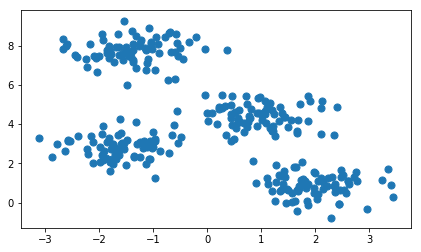

In [127]:
from sklearn.datasets.samples_generator import make_blobs

sample_data, sample_target = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(sample_data[:, 0], sample_data[:, 1], s=50);

In [128]:
Sum_of_squared_distances = []
Silhouette_score = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(sample_data)
    
    Sum_of_squared_distances.append( km.inertia_ )
    if k == 1:
        Silhouette_score.append( 1 )
    else:
        Silhouette_score.append( silhouette_score( sample_data, km.labels_ ) )

Text(0, 0.5, 'Silhouette_score')

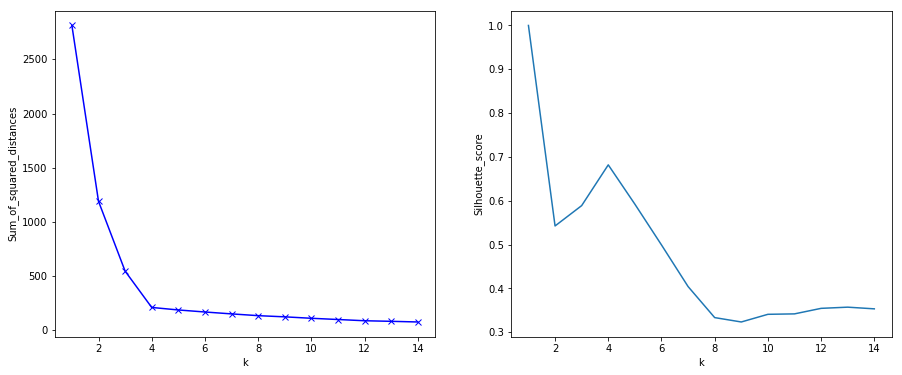

In [129]:
fig = plt.figure(figsize=[15,6])

ax1 = fig.add_subplot(1,2,1)
ax1.plot(K, Sum_of_squared_distances, 'bx-')
ax1.set_xlabel('k')
ax1.set_ylabel('Sum_of_squared_distances')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(K, Silhouette_score)
ax2.set_xlabel('k')
ax2.set_ylabel('Silhouette_score')

### Select K=4

In [130]:
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(sample_data)
predicted4 = kmeans4.predict(sample_data)

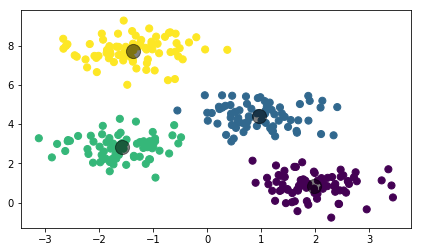

In [131]:
plt.scatter(sample_data[:, 0], sample_data[:, 1], c=predicted4, s=50, cmap='viridis')

centers4 = kmeans4.cluster_centers_
plt.scatter(centers4[:, 0], centers4[:, 1], c='black', s=200, alpha=0.5);

## Complicated Geometry Boundary

Make two interleaving half circles

**make_moons**(n_samples=100, shuffle=True, noise=None, random_state=None)

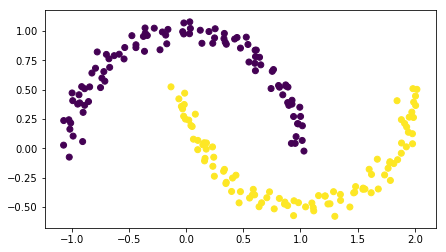

In [136]:
from sklearn.datasets import make_moons

moon_data, moon_target = make_moons(200, noise=.05, random_state=0)

plt.scatter(moon_data[:, 0], moon_data[:, 1], c=moon_target)

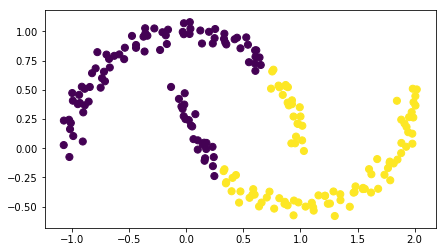

In [138]:
labels = KMeans(2, random_state=0).fit_predict(moon_data)

plt.scatter(moon_data[:, 0], moon_data[:, 1], c=labels, s=50, cmap='viridis');

In [139]:
accuracy_score(moon_target,labels)

0.755

In [140]:
silhouette_score( moon_data, labels ) 

0.49215648268306905

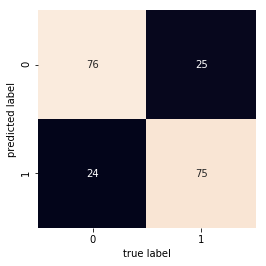

In [27]:
moon_cm = confusion_matrix(moon_target,labels)
sb.heatmap(moon_cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [28]:
print (classification_report(moon_target,labels))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       100
           1       0.76      0.75      0.75       100

   micro avg       0.76      0.76      0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.76      0.76      0.75       200

